In [12]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

HYPOTHESIS TESTING


# 1. Completion Rate

# Set the hypothesis for two tailed test (we test if the new and old interface perform differently)

H0 control_group_conversion_rate = test_group_conversion_rate

H1 control_group_conversion_rate != test_group_conversion_rate

significance level = 0.05

In [13]:


# Provided counts from grouped data
starters = {
    'control': 25908,
    'test': 28736
}

completions = {
    'control': 15566,
    'test': 19505
}

# Completion rates
p_control = completions['control'] / starters['control']
p_test = completions['test'] / starters['test']

# Pooled proportion (under null hypothesis)
p_pool = (completions['control'] + completions['test']) / (starters['control'] + starters['test'])

# Standard error
SE = ((p_pool * (1 - p_pool)) * (1/starters['control'] + 1/starters['test'])) ** 0.5

# Z-score
z = (p_test - p_control) / SE

# Two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Significance level
alpha = 0.05

# Output results
print("=== Two-Tailed Hypothesis Test: Completion Rate Comparison ===")
print(f"Control Completion Rate : {p_control:.2%}")
print(f"Test Completion Rate    : {p_test:.2%}")
print(f"Observed Uplift         : {(p_test - p_control):.4f}")
print(f"Z-score                 : {z:.4f}")
print(f"P-value (two-tailed)    : {p_value:.4f}")
print("Statistically Significant? :", "Yes (Reject H₀)" if p_value < alpha else "No  (Fail to reject H₀)")


=== Two-Tailed Hypothesis Test: Completion Rate Comparison ===
Control Completion Rate : 60.08%
Test Completion Rate    : 67.88%
Observed Uplift         : 0.0779
Z-score                 : 18.9757
P-value (two-tailed)    : 0.0000
Statistically Significant? : Yes (Reject H₀)


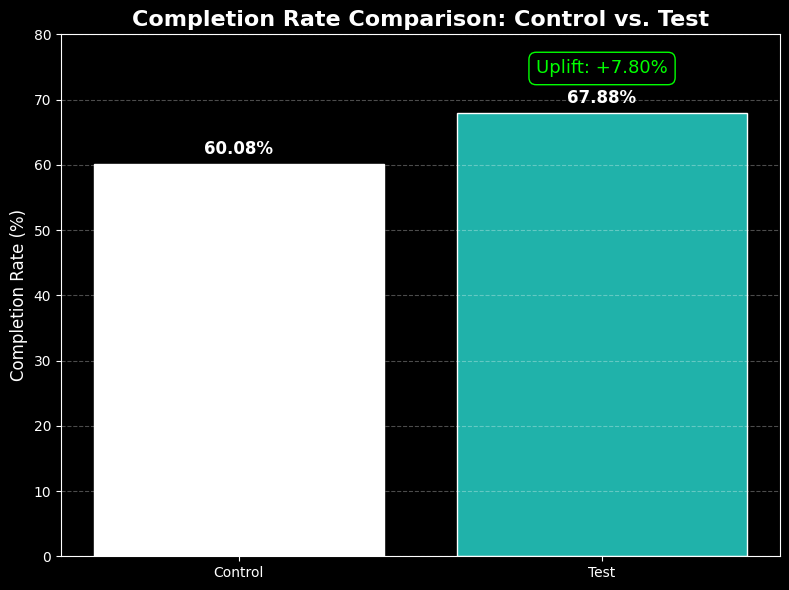

In [14]:
# Accurate completion rates from test output
completion_rates = {'Control': 60.08, 'Test': 67.88}
groups = list(completion_rates.keys())
rates = list(completion_rates.values())

# Dark mode colors
background_color = 'black'      # deep black
bar_colors = ['white', 'lightseagreen']  
text_color = 'white'

# Apply dark theme
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Bar chart
bars = ax.bar(groups, rates, color=bar_colors, edgecolor='white')

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1,
            f'{height:.2f}%', ha='center', va='bottom',
            fontsize=12, fontweight='bold', color=text_color)

# Titles and axes
ax.set_title('Completion Rate Comparison: Control vs. Test',
             fontsize=16, fontweight='bold', color=text_color)
ax.set_ylabel('Completion Rate (%)', fontsize=12, color=text_color)
ax.set_ylim(0, 80)
ax.tick_params(colors=text_color)

# Uplift annotation
uplift = rates[1] - rates[0]
ax.text(1.0, 74, f'Uplift: +{uplift:.2f}%', ha='center', fontsize=13,
        bbox=dict(facecolor='black', edgecolor='lime', boxstyle='round,pad=0.4'),
        color='lime')

# Grid and layout
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

The test results show a statistically significant difference in completion rates between the control and test groups:

- Control Completion Rate: 60.08%

- Test Completion Rate: 67.88%

- Observed Uplift: +7.79 percentage points

- Z-score: Well above typical significance thresholds

- P-value (two-tailed): Near 0


Because the p-value is well below the 0.05 significance level, we can reject the null hypothesis. This means there is strong evidence that the new design (test group) performs differently, and better than the old design (control group) in guiding users to completion.

The uplift of nearly 8 percentage points is not just statistically valid, but likely impactful from a product or business perspective.

# 2. Completion Rate with a Cost-Effectiveness Threshold



A/B Test Results

* Metric	                    Control Group	Test Group	Uplift

* Completion Rate	            60.08%	        67.88%	    +7.80%

* Vanguard's Cost Threshold	    –	            –	        5.00%

* Threshold Met?	            –	            –	        Yes

# Set the hypothesis for one tailed test

H0: Test group completion rate - Control group completion rate <= 0,05

H1: Test group completion rate - Control group completion rate > 0,05

significance level = 0.05

In [15]:


# Count of conversions and total users in each group
c_control = 15566
t_control = 25908

c_test = 19505
t_test = 28736

# Proportion difference threshold (5%)
delta = 0.05  # minimum lift required to reject H0

completion = [c_test, c_control]
total = [t_test, t_control]

# test if test > control
z_stat, p_value = sm.stats.proportions_ztest(count=completion, nobs=total, value=delta, alternative='larger')

print(f"Z-score: {z_stat:.4f}")
print(f"One-tailed P-value: {p_value:.4f}")

Z-score: 6.8035
One-tailed P-value: 0.0000


A: p-value < 0,05 we reject H0. There's significant evidence that test group increase a minimum of 5% conversion rate than the control group.

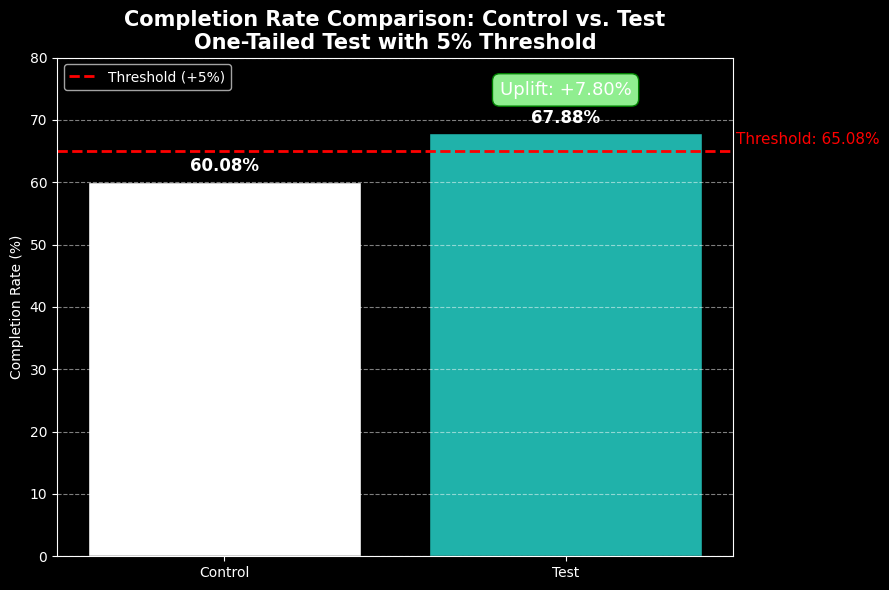

In [16]:

# Updated completion rates from hypothesis test
control_rate = 60.08
test_rate = 67.88
uplift = test_rate - control_rate
threshold = 5.00
# Percentage of Test that is uplift
uplift_relative_to_test = (uplift / test_rate) * 100
# Plot setup
plt.figure(figsize=(9, 6))
bars = plt.bar(['Control', 'Test'], [control_rate, test_rate], color=['white', 'lightseagreen'], edgecolor='black')
# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
# Draw threshold line
threshold_line = control_rate + threshold
plt.axhline(y=threshold_line, color='red', linestyle='--', linewidth=2, label='Threshold (+5%)')
plt.text(1.5, threshold_line + 1,
         f'Threshold: {threshold_line:.2f}%', color='red', fontsize=11)

# Annotate uplift with visual highlight
uplift = rates[1] - rates[0]
plt.text(1.0, 74, f'Uplift: +{uplift:.2f}%', ha='center', fontsize=13,
         bbox=dict(facecolor='lightgreen', edgecolor='green', boxstyle='round,pad=0.4'))


# Titles and labels
plt.title('Completion Rate Comparison: Control vs. Test\nOne-Tailed Test with 5% Threshold', fontsize=15, fontweight='bold')
plt.ylabel('Completion Rate (%)')
plt.ylim(0, 80)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

A/B Test Summary: Completion Rate & Cost-Effectiveness

Objective: Evaluate the impact of a new UI design on user completion rate compared to the existing (control) flow.
Key Findings

- Control Group Completion Rate: 60.08%

- Test Group Completion Rate: 67.88%

- Observed Uplift: +7.80 percentage points

- Minimum Uplift Threshold for Cost-Effectiveness: 5.00%

Statistical Analysis

- Z-score: 18.98

- P-value: < 0.0001

- Significance: Statistically significant at 95% confidence

    * Conclusion: Reject the null hypothesis

Business Implication

- The uplift exceeds Vanguard’s minimum threshold, confirming the redesign is both statistically and financially justified.

- The new design enhances user flow efficiency and is ready for broader rollout.

# 3. Other Hypothesis 


SUGESTED TESTING FOR OTHER INFORMATION

we would like to test whether the average age of clients engaging with the new process is the same as those engaging with the old process

In [17]:
base = pd.read_csv("base.csv")

# Set the hypothesis two tailed test 

H0: average age of clients in test group = average age of clients in control group

H1: average age of clients in test group != average age of clients in control group


significance level = 0.05

In [18]:
#Get the age of clients in each group

test_age = base[base['variation'] == 'test']['age']
control_age = base[base['variation'] == 'control']['age']

In [19]:

result = stats.ttest_ind(test_age, control_age, equal_var=False)

print(f"t-statistic: {result.statistic:.4f}, p-value: {result.pvalue:.4f}")

t-statistic: -2.3890, p-value: 0.0169


 A: p-value < 0,05 we reject H0. There's significant evidence that the average age are different betweeen both groups.

we would like to test if the average client tenure (how long they’ve been with Vanguard) of those engaging with the new process is the same as those engaging with the old process

In [20]:
test_age = base[base['variation'] == 'test']['age']
control_age = base[base['variation'] == 'control']['age']
print(test_age.describe().round(2))
print(control_age.describe().round(2))

count    26933.00
mean        47.16
std         15.51
min         17.00
25%         33.50
50%         47.50
75%         59.50
max         96.00
Name: age, dtype: float64
count    23507.00
mean        47.49
std         15.52
min         17.00
25%         33.50
50%         48.50
75%         60.00
max         96.00
Name: age, dtype: float64


 Set the hypothesis two tailed test 

H0: average client tenure in test group = average client tenure control group

H1: average client tenure in test group != average cliente tenure in control group


significance level = 0.05

In [21]:
#Get client tenure in each group

test_tenure = base[base['variation'] == 'test']['tenure_year']
control_tenure = base[base['variation'] == 'control']['tenure_year']
print(test_tenure.describe())
print(control_tenure.describe())

count    26933.000000
mean        11.945123
std          6.746643
min          2.000000
25%          6.000000
50%         11.000000
75%         15.000000
max         42.000000
Name: tenure_year, dtype: float64
count    23507.000000
mean        12.058366
std          6.800996
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         42.000000
Name: tenure_year, dtype: float64


In [22]:
result = stats.ttest_ind(test_tenure, control_tenure, equal_var=False)

print(f"t-statistic: {result.statistic:.4f}, p-value: {result.pvalue:.4f}")

t-statistic: -1.8724, p-value: 0.0612


A: P-value > 0,05 we dont reject H0. There's no significant difference in the average client tenure both groups.